# Pruebas Machine Learning 

In [1]:
#Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# 2. Cargar el dataset original
df = pd.read_csv(r"C:\\users\\usuario\\Desktop\\FFFF\\proyecto_final_henry\\data\\flights.csv")

# 3. Seleccionar las dos variables relevantes para la regresión
variables = ['scheduled_departure', 'status']

# Eliminar filas con valores nulos en las columnas seleccionadas
df = df.dropna(subset=variables)

# Convertir 'scheduled_departure' a formato numérico (número de minutos desde medianoche)
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'], errors='coerce')
df['scheduled_departure'] = df['scheduled_departure'].dt.hour * 60 + df['scheduled_departure'].dt.minute

# Verificar y eliminar posibles valores nulos después de la conversión
df = df.dropna(subset=['scheduled_departure'])

# Convertir 'status' a formato numérico usando Label Encoding
le = LabelEncoder()
df['status_encoded'] = le.fit_transform(df['status'])

# Verificar los valores únicos después de la transformación
print(df[['status', 'status_encoded']].drop_duplicates())

# Agregar la columna de 'scheduled_departure' al DataFrame
df_encoded = df[['status_encoded', 'scheduled_departure']]

# Definir la variable independiente (X) y la variable dependiente (y)
X = df_encoded[['status_encoded']]
y = df_encoded['scheduled_departure']

# 6. Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 9. Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación R²: {r2}")

# 10. Mostrar los coeficientes del modelo para interpretar la importancia
coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])
print(coeficientes)






        status  status_encoded
0    Scheduled               5
13   Cancelled               1
26     Arrived               0
30     On Time               4
32     Delayed               2
708   Departed               3
Error cuadrático medio: 45255.40737935
Coeficiente de determinación R²: 0.00024378702117611173
                Coeficientes
status_encoded      0.413681


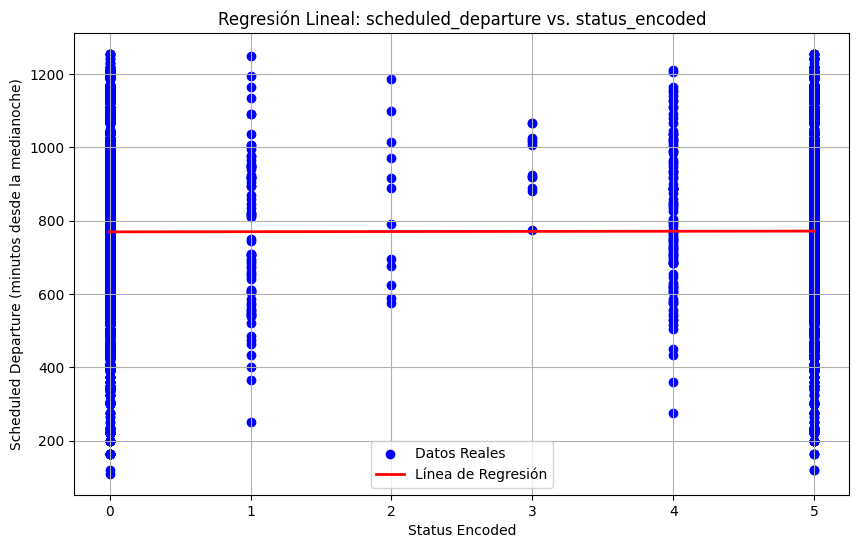

In [9]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))

# Graficar los datos reales
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')

# Graficar la línea de regresión
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

plt.title('Regresión Lineal: scheduled_departure vs. status_encoded')
plt.xlabel('Status Encoded')
plt.ylabel('Scheduled Departure (minutos desde la medianoche)')
plt.legend()
plt.grid(True)
plt.show()


Este gráfico muestra la relación entre la ocupación de los vuelos (scheduled_departure) y el estado del vuelo (status_encoded). 
Los puntos azules representan los datos reales, mientras que la línea roja muestra la tendencia general calculada por el modelo de regresión lineal. 
La línea de regresión ayuda a visualizar cómo varía la ocupación en función del estado del vuelo

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


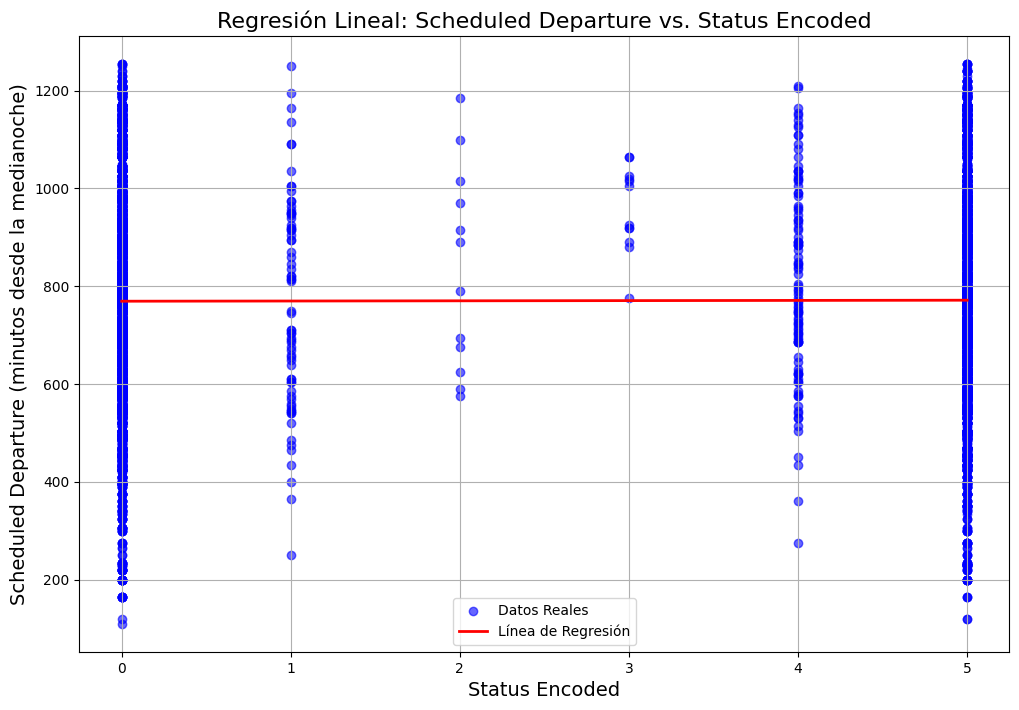

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Ordenar los valores de X_test para que la línea de regresión sea continua
X_test_sorted = np.sort(X_test.values.flatten())
y_pred_sorted = model.predict(X_test_sorted.reshape(-1, 1))

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(12, 8))

# Graficar los datos reales
plt.scatter(X_test, y_test, color='blue', label='Datos Reales', alpha=0.6)

# Graficar la línea de regresión
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Línea de Regresión')

# Configurar título y etiquetas
plt.title('Regresión Lineal: Scheduled Departure vs. Status Encoded', fontsize=16)
plt.xlabel('Status Encoded', fontsize=14)
plt.ylabel('Scheduled Departure (minutos desde la medianoche)', fontsize=14)

# Agregar leyenda
plt.legend()

# Agregar cuadrícula
plt.grid(True)

# Mostrar gráfico
plt.show()
